**Transformer Architecture**

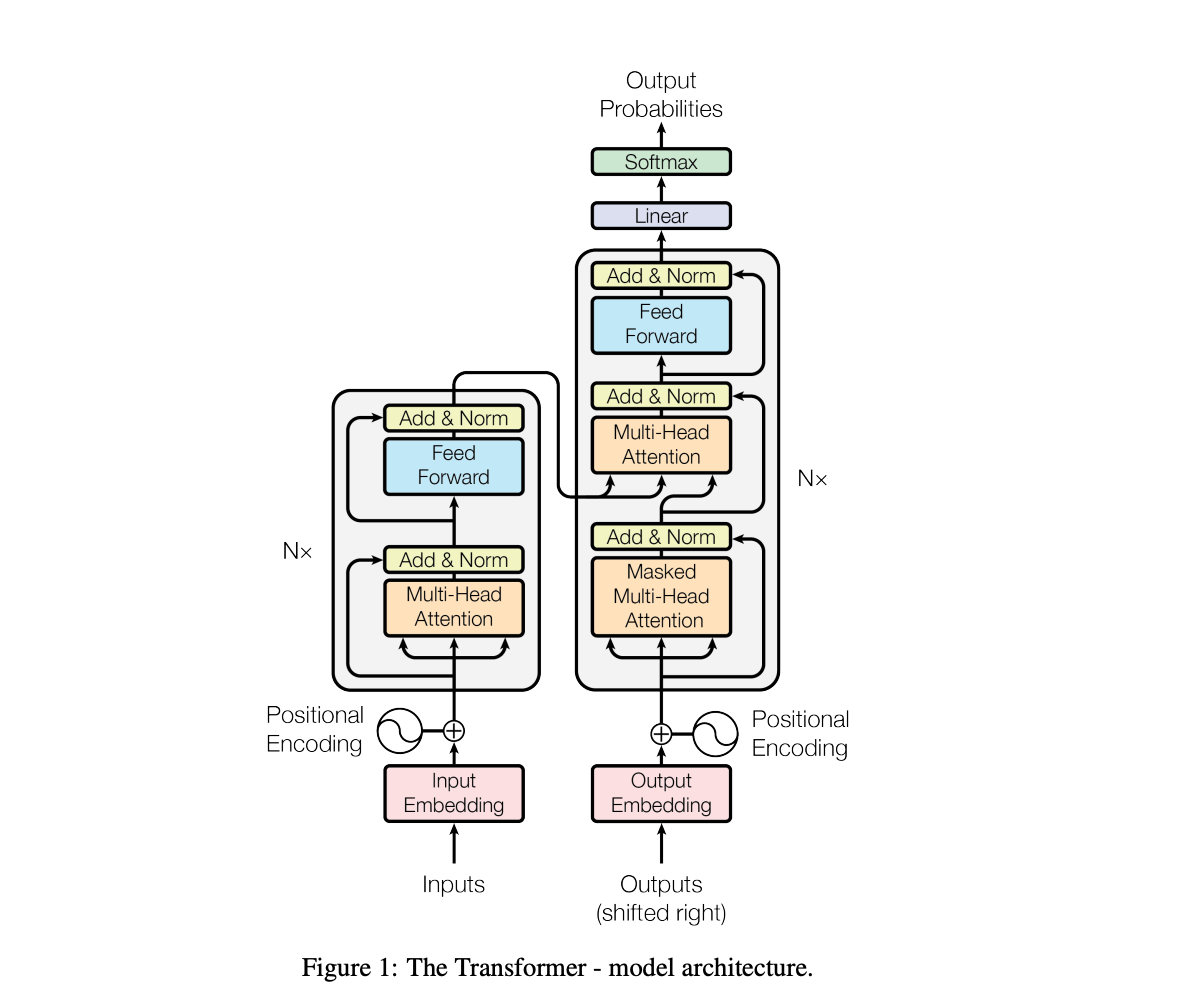

**Workflow**


1. Importing Libraries
2. Input Embedding
3. Positional Encoding
4. Multihead Attention (Self Attention)
5. Add and Norm (Layer Normalization)
6. Feed Forward Network
7. Residual Connection
8. Encoder
9. Decoder
10. Building a Transformer
11. Test the Transformer
12. Tokenizer
13. Loading Dataset
14. Validation Loop
15. Training Loop
16. Conclusion


1. **Importing Libraries**

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, random_split
from torch.utils.tensorboard import SummaryWriter
# Math
import math
# HuggingFace Libraries
from datasets import load_dataset
from tokenizers import Tokenizer
from tokenizers.models import WordLevel
from tokenizers.trainers import WordLevelTrainer
from tokenizers.pre_tokenizers import Whitespace
# Pathlib
from pathlib import Path
# Typing
from typing import Any
# Library for progress bars in loops
from tqdm import tqdm
# Importing libraries of warnings
import warnings

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import sys
print(sys.executable)


/opt/homebrew/opt/python@3.11/bin/python3.11


2. **Input Embedding**

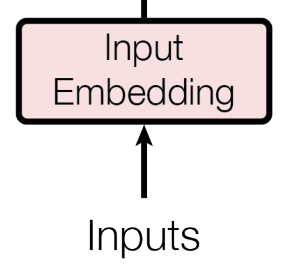

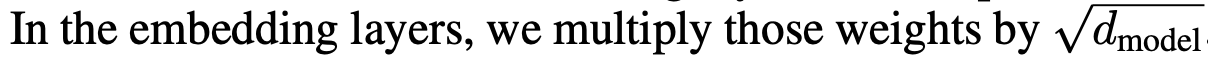

d_model=512

**English sentence** : I had a guitar and it was red in color.

**Tokens** : I, had, a, guitar, and, it, was, red, in, color

**Vocabulary** : a=0, it=1, in=2, the=3, was=4, had=5, has=6, color=7, guitar=8, I=9

In [3]:
 class InputEmbeddings(nn.Module):
    def __init__(self, d_model: int,vocab_size: int):
        super.__init__()
        self.d_model = d_model
        self.vocab_size = vocab_size
        self.embedding = nn.Embedding(vocab_size, d_model)

        def forward(self, x):
            return self.embedding(x) * math.sqrt(self.d_model)
      

max_sequence_length = 10, <br> embedding_dim = 512

3. **Positional Encoding**

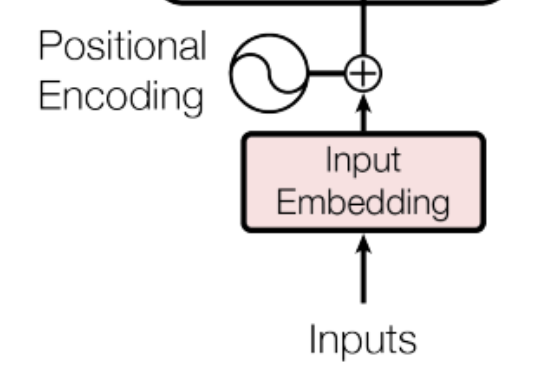

Positional encodings have the same dimension d_model as the embeddings so that the two can be summer.

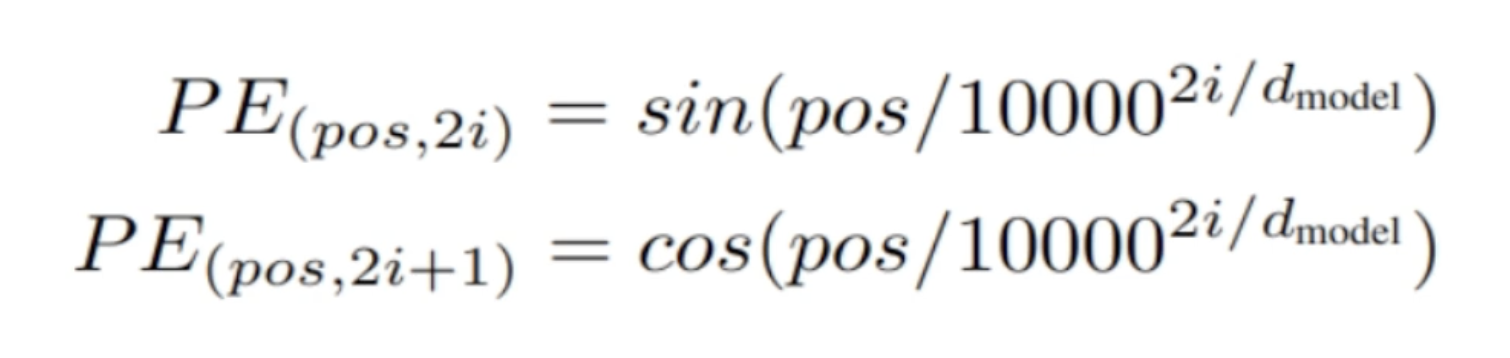

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model: int, seq_len: int, dropout: float):
        super().__init__()
        self.d_model = d_model
        self.dropout = nn.Dropout(dropout)
        self.seq_len = seq_len
        
        pe=torch.zeros(seq_len, d_model)
        position=torch.arange(0, seq_len, dtype=torch.float).unsqueeze(1)

        div_term=torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

        def forward(self, x):
            x = x + self.pe[:, :x.shape[1], :].require_grad_(False)
            return self.dropout(x)